## Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('SriLanka_Weather_Dataset_V1.csv')

### Data Overview

In [4]:
df["weathercode"].unique()

array([ 2, 51,  1,  3, 53, 61, 63,  0, 65, 55])

In [19]:
df.head(3)

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,country,city
0,1/1/2010,2,30.0,22.7,26.1,34.4,25.2,29.2,6:22:00 AM,6:05:00 PM,...,0,11.7,27.4,20,4.58,7.0,79.899994,16,Sri Lanka,Colombo
1,1/2/2010,51,29.9,23.5,26.2,33.8,26.2,29.8,6:22:00 AM,6:06:00 PM,...,1,13.0,27.0,24,3.84,7.0,79.899994,16,Sri Lanka,Colombo
2,1/3/2010,51,29.5,23.2,26.0,34.3,26.3,29.9,6:23:00 AM,6:06:00 PM,...,3,12.3,27.4,16,3.65,7.0,79.899994,16,Sri Lanka,Colombo


In [20]:
df['city'].unique()

array(['Colombo', 'Mount Lavinia', 'Kesbewa', 'Moratuwa', 'Maharagama',
       'Ratnapura', 'Kandy', 'Negombo', 'Sri Jayewardenepura Kotte',
       'Kalmunai', 'Trincomalee', 'Galle', 'Jaffna', 'Athurugiriya',
       'Weligama', 'Matara', 'Kolonnawa', 'Gampaha', 'Puttalam',
       'Badulla', 'Kalutara', 'Bentota', 'Matale', 'Mannar', 'Pothuhera',
       'Kurunegala', 'Mabole', 'Hatton', 'Hambantota', 'Oruwala'],
      dtype=object)

In [21]:
df=df[df["city"].isin(['Colombo', 'Mount Lavinia', 'Kesbewa',
         'Negombo', 
        'Trincomalee', 'Galle', 'Jaffna', 
       'Weligama', 'Matara',   
         'Bentota',  'Mannar', 
          'Hambantota', 'Oruwala'])]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63908 entries, 0 to 147479
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        63908 non-null  object 
 1   weathercode                 63908 non-null  int64  
 2   temperature_2m_max          63908 non-null  float64
 3   temperature_2m_min          63908 non-null  float64
 4   temperature_2m_mean         63908 non-null  float64
 5   apparent_temperature_max    63908 non-null  float64
 6   apparent_temperature_min    63908 non-null  float64
 7   apparent_temperature_mean   63908 non-null  float64
 8   sunrise                     63908 non-null  object 
 9   sunset                      63908 non-null  object 
 10  shortwave_radiation_sum     63908 non-null  float64
 11  precipitation_sum           63908 non-null  float64
 12  rain_sum                    63908 non-null  float64
 13  snowfall_sum                63908 n

In [23]:
df.describe()

,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation
count,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000,63908.0,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000,63908.000000
mean,45.495994,29.637757,24.839080,26.928136,34.577527,28.695583,31.063651,18.883528,5.592513,5.592513,0.0,8.689053,17.736171,35.460426,187.421543,4.067148,7.130770,80.230769,10.461538
std,22.284831,1.725862,1.267876,1.177448,2.512719,1.749322,1.682237,4.240146,9.531462,9.531462,0.0,7.378802,7.121331,10.387194,92.359104,1.071965,1.143812,0.446162,5.078128
min,0.000000,21.500000,18.400000,20.700000,22.100000,16.400000,18.700000,1.390000,0.000000,0.000000,0.0,0.000000,4.000000,11.500000,0.000000,0.590000,6.000000,79.899994,5.000000
25%,51.000000,28.500000,24.100000,26.100000,33.000000,27.800000,30.100000,16.590000,0.300000,0.300000,0.0,2.000000,12.300000,27.000000,99.000000,3.380000,6.200005,79.899994,6.000000
50%,53.000000,29.400000,24.800000,26.800000,34.600000,28.900000,31.100000,19.650000,2.300000,2.300000,0.0,7.000000,16.600000,33.800000,217.000000,4.040000,6.900002,80.000000,10.000000
75%,61.000000,30.600000,25.600000,27.700000,36.300000,29.800000,32.100000,21.950000,7.100000,7.100000,0.0,15.000000,22.000000,42.800000,256.000000,4.760000,7.099998,80.399994,15.000000
max,65.000000,36.600000,30.000000,31.400000,43.400000,34.700000,36.800000,28.430000,261.800000,261.800000,0.0,24.000000,50.200000,78.100000,360.000000,8.140000,9.700005,81.200010,20.000000


In [24]:
categorical_features =list(df.select_dtypes(['object']).columns)
categorical_features

['time', 'sunrise', 'sunset', 'country', 'city']

In [25]:
df["country"].unique()

array(['Sri Lanka'], dtype=object)

In [26]:
df.drop("country", axis=1, inplace=True)

In [27]:
df['sunset'] = pd.to_datetime(df['time'] + ' ' + df['sunset'], format='%m/%d/%Y %I:%M:%S %p')
df['sunrise'] = pd.to_datetime(df['time'] + ' ' + df['sunrise'], format='%m/%d/%Y %I:%M:%S %p')

In [28]:
df['time'] = pd.to_datetime(df['time'])

In [29]:
df['city'].unique()

array(['Colombo', 'Mount Lavinia', 'Kesbewa', 'Negombo', 'Trincomalee',
       'Galle', 'Jaffna', 'Weligama', 'Matara', 'Bentota', 'Mannar',
       'Hambantota', 'Oruwala'], dtype=object)

In [30]:
encoder = LabelEncoder()
df['city'] = encoder.fit_transform(df['city'])

In [31]:
city_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("City to Encoded Number Mapping:", city_mapping)

City to Encoded Number Mapping: {'Bentota': 0, 'Colombo': 1, 'Galle': 2, 'Hambantota': 3, 'Jaffna': 4, 'Kesbewa': 5, 'Mannar': 6, 'Matara': 7, 'Mount Lavinia': 8, 'Negombo': 9, 'Oruwala': 10, 'Trincomalee': 11, 'Weligama': 12}


In [32]:
df['snowfall_sum'].unique()

array([0])

In [33]:
df.drop('snowfall_sum', axis=1, inplace=True)

In [34]:
df.corr()

,time,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,sunrise,sunset,...,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,latitude,longitude,elevation,city
time,1.000000e+00,0.026208,0.063611,0.043640,0.070989,0.056702,0.058353,0.074791,1.000000e+00,1.000000e+00,...,-0.011207,0.047383,-0.019316,-0.035655,-0.034722,0.016708,1.626474e-15,-3.117679e-14,3.570006e-15,6.349405e-15
weathercode,2.620782e-02,1.000000,-0.342416,-0.009934,-0.288258,0.010721,0.306384,0.157098,2.620628e-02,2.620730e-02,...,0.409701,0.661197,-0.201040,-0.033008,0.198195,-0.596558,-2.592984e-01,-1.401359e-01,1.324627e-01,-6.338449e-03
temperature_2m_max,6.361135e-02,-0.342416,1.000000,0.352610,0.831151,0.759122,0.279572,0.605176,6.361116e-02,6.361313e-02,...,-0.363832,-0.551998,-0.003602,-0.075242,0.013702,0.761694,1.038727e-01,1.829456e-01,3.156134e-02,2.914404e-02
temperature_2m_min,4.364006e-02,-0.009934,0.352610,1.000000,0.763794,0.186918,0.681831,0.445563,4.363690e-02,4.364238e-02,...,-0.138928,-0.079108,0.561899,0.445395,0.300755,0.361968,3.831278e-01,1.223801e-01,-3.022235e-01,-4.176142e-02
temperature_2m_mean,7.098916e-02,-0.288258,0.831151,0.763794,1.000000,0.575901,0.541975,0.653356,7.098743e-02,7.099174e-02,...,-0.388225,-0.459906,0.315618,0.188004,0.181419,0.737608,2.975685e-01,1.624857e-01,-1.628714e-01,-2.500928e-02
apparent_temperature_max,5.670223e-02,0.010721,0.759122,0.186918,0.575901,1.000000,0.520430,0.867349,5.670183e-02,5.670329e-02,...,-0.173311,-0.258042,-0.465654,-0.452428,0.062638,0.422903,-1.260044e-01,-6.040638e-03,1.370024e-01,2.420606e-03
apparent_temperature_min,5.835310e-02,0.306384,0.279572,0.681831,0.541975,0.520430,1.000000,0.829041,5.835014e-02,5.835473e-02,...,-0.013741,0.154391,-0.090589,-0.028620,0.362166,0.035415,-4.239041e-02,-5.936365e-02,-1.685123e-02,-9.785731e-02
apparent_temperature_mean,7.479132e-02,0.157098,0.605176,0.445563,0.653356,0.867349,0.829041,1.000000,7.478953e-02,7.479287e-02,...,-0.141042,-0.088262,-0.356120,-0.306242,0.247610,0.255190,-1.286645e-01,-6.224760e-02,1.006696e-01,-7.712789e-02
sunrise,1.000000e+00,0.026206,0.063611,0.043637,0.070987,0.056702,0.058350,0.074790,1.000000e+00,1.000000e+00,...,-0.011208,0.047381,-0.019318,-0.035657,-0.034725,0.016708,5.446537e-08,-8.838620e-07,1.830402e-07,-2.088812e-07
sunset,1.000000e+00,0.026207,0.063613,0.043642,0.070992,0.056703,0.058355,0.074793,1.000000e+00,1.000000e+00,...,-0.011208,0.047383,-0.019315,-0.035652,-0.034721,0.016709,9.990062e-08,-8.902279e-07,1.682288e-07,-2.034521e-07


<Axes: >

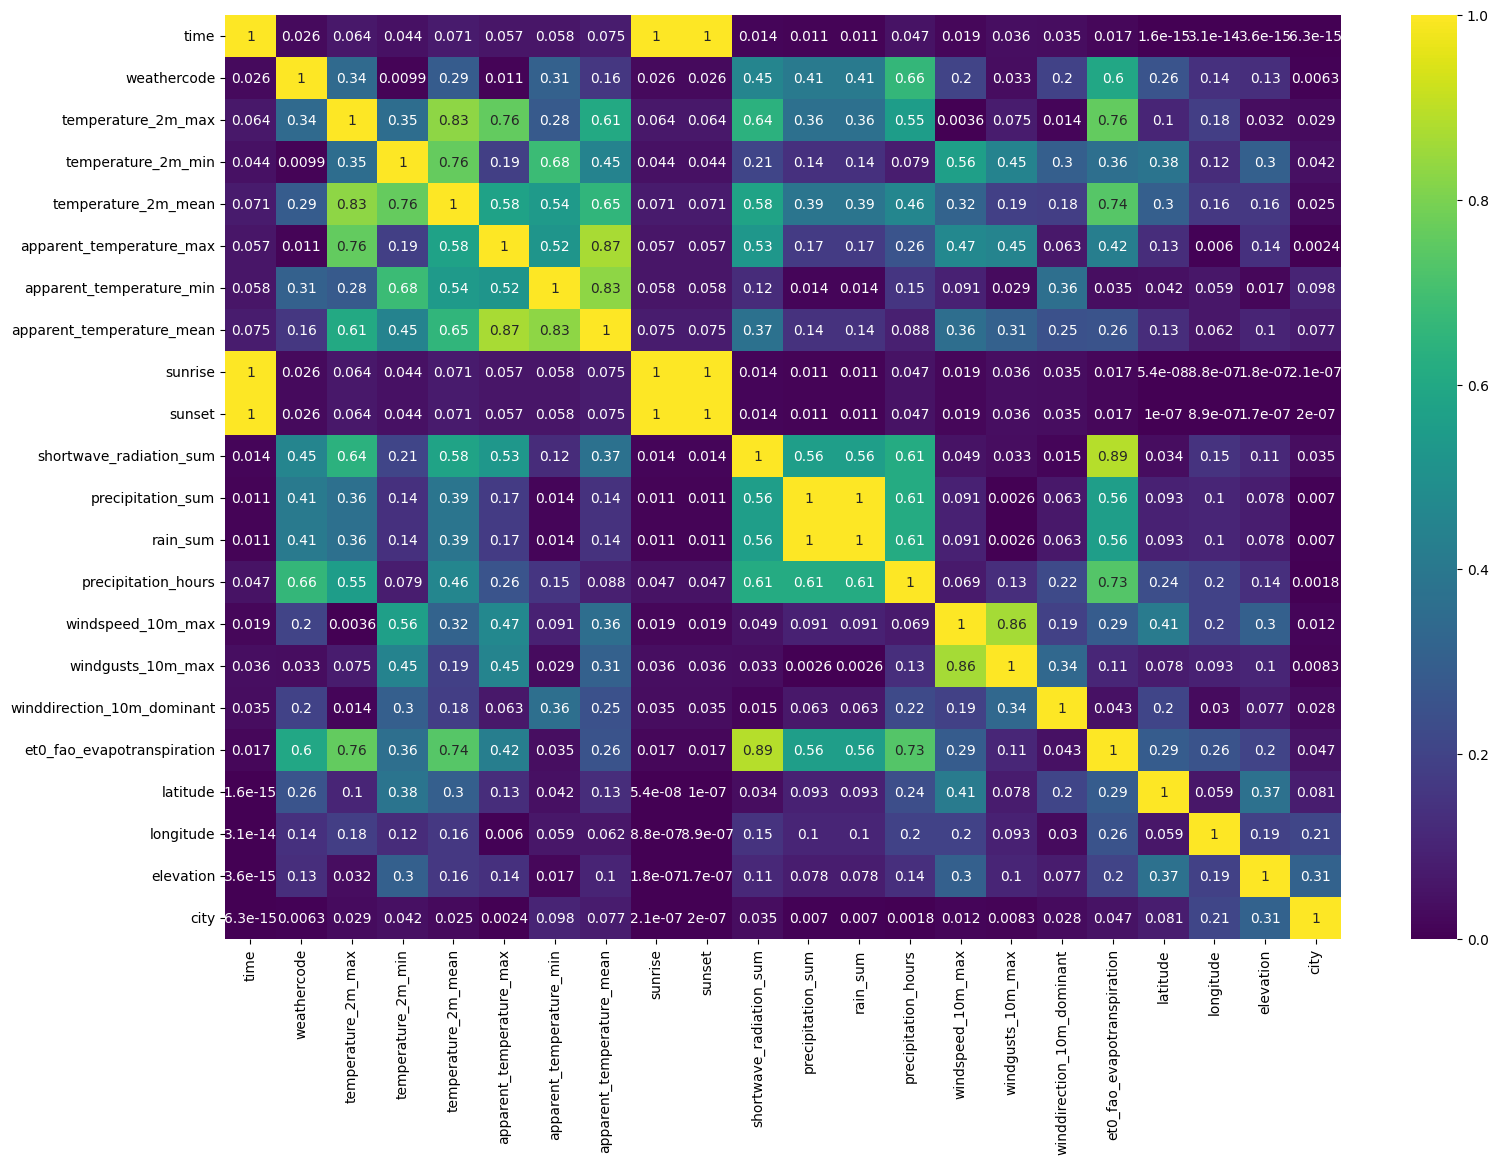

In [35]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr().abs(),annot=True,cmap='viridis')

In [36]:
df.columns

Index(['time', 'weathercode', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'apparent_temperature_max',
       'apparent_temperature_min', 'apparent_temperature_mean', 'sunrise',
       'sunset', 'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max',
       'winddirection_10m_dominant', 'et0_fao_evapotranspiration', 'latitude',
       'longitude', 'elevation', 'city'],
      dtype='object')

In [37]:
df.drop(["temperature_2m_max","temperature_2m_min", "apparent_temperature_max","apparent_temperature_min"], axis=1, inplace=True)

In [38]:
df.columns

Index(['time', 'weathercode', 'temperature_2m_mean',
       'apparent_temperature_mean', 'sunrise', 'sunset',
       'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max',
       'winddirection_10m_dominant', 'et0_fao_evapotranspiration', 'latitude',
       'longitude', 'elevation', 'city'],
      dtype='object')

In [39]:
df.corr()["windspeed_10m_max"].sort_values()

apparent_temperature_mean    -0.356120
elevation                    -0.302920
weathercode                  -0.201040
precipitation_sum            -0.091143
rain_sum                     -0.091143
precipitation_hours          -0.069470
sunrise                      -0.019318
time                         -0.019316
sunset                       -0.019315
city                          0.012444
shortwave_radiation_sum       0.049317
winddirection_10m_dominant    0.194643
longitude                     0.197869
et0_fao_evapotranspiration    0.287045
temperature_2m_mean           0.315618
latitude                      0.412727
windgusts_10m_max             0.863800
windspeed_10m_max             1.000000
Name: windspeed_10m_max, dtype: float64

<Axes: >

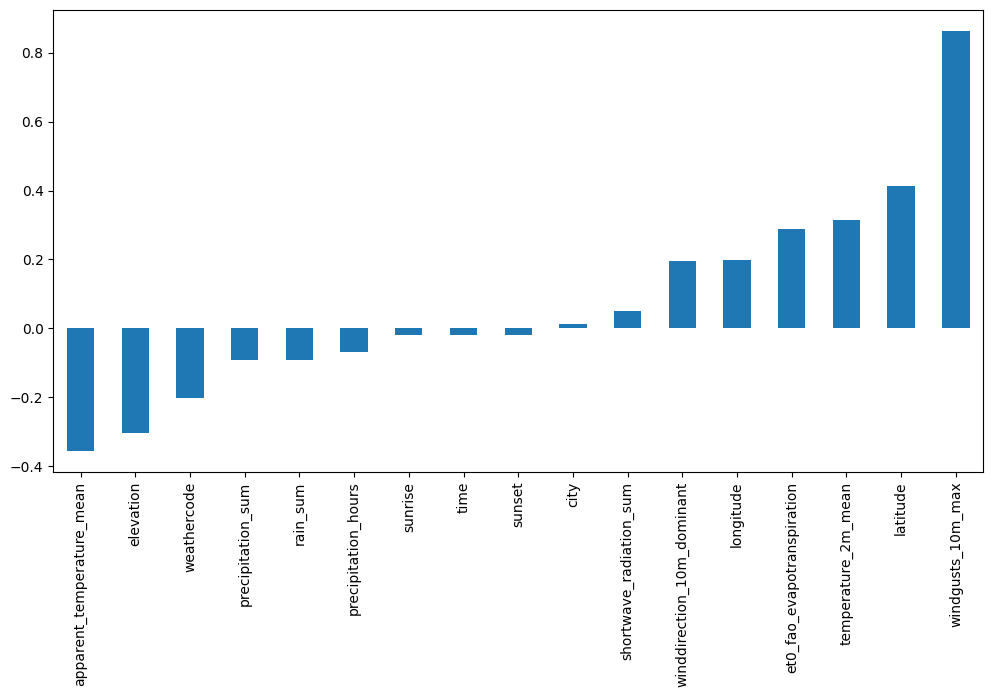

In [40]:
plt.figure(figsize=(12,6))
df.corr()["windspeed_10m_max"].sort_values().drop("windspeed_10m_max").plot(kind="bar")

In [41]:
df.corr()["windgusts_10m_max"].sort_values()

apparent_temperature_mean    -0.306242
elevation                    -0.104409
sunrise                      -0.035657
time                         -0.035655
sunset                       -0.035652
shortwave_radiation_sum      -0.033295
weathercode                  -0.033008
precipitation_sum            -0.002601
rain_sum                     -0.002601
city                          0.008286
latitude                      0.077590
longitude                     0.093434
et0_fao_evapotranspiration    0.106255
precipitation_hours           0.131682
temperature_2m_mean           0.188004
winddirection_10m_dominant    0.335232
windspeed_10m_max             0.863800
windgusts_10m_max             1.000000
Name: windgusts_10m_max, dtype: float64

<Axes: >

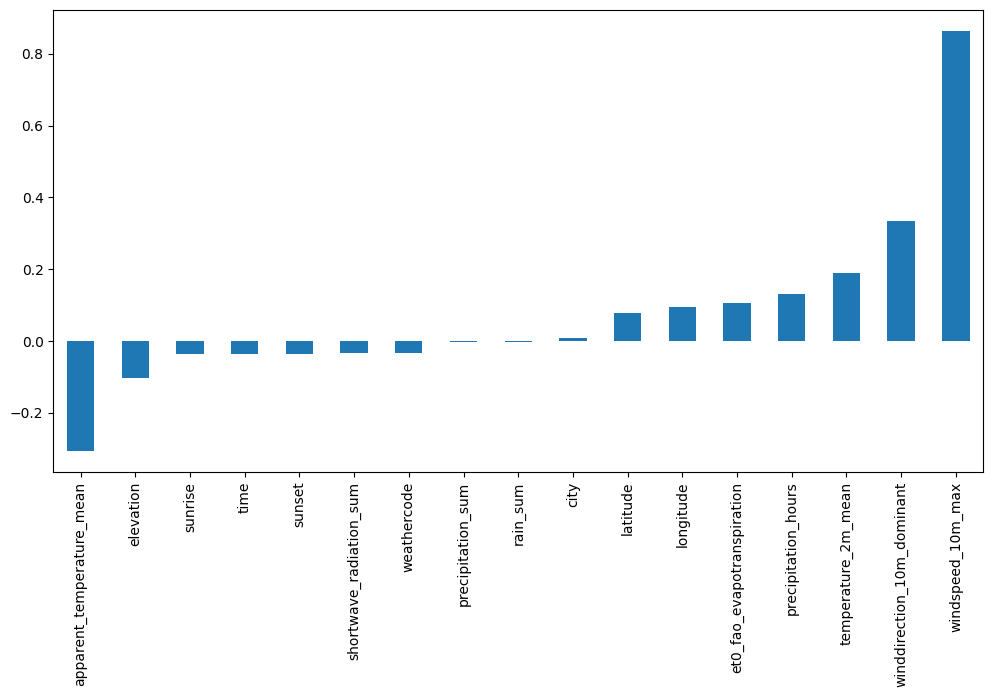

In [42]:
plt.figure(figsize=(12,6))
df.corr()["windgusts_10m_max"].sort_values().drop("windgusts_10m_max").plot(kind="bar")

In [43]:
df.corr()["apparent_temperature_mean"].sort_values()

windspeed_10m_max            -0.356120
windgusts_10m_max            -0.306242
precipitation_sum            -0.141042
rain_sum                     -0.141042
latitude                     -0.128665
precipitation_hours          -0.088262
city                         -0.077128
longitude                    -0.062248
sunrise                       0.074790
time                          0.074791
sunset                        0.074793
elevation                     0.100670
weathercode                   0.157098
winddirection_10m_dominant    0.247610
et0_fao_evapotranspiration    0.255190
shortwave_radiation_sum       0.374598
temperature_2m_mean           0.653356
apparent_temperature_mean     1.000000
Name: apparent_temperature_mean, dtype: float64

<Axes: >

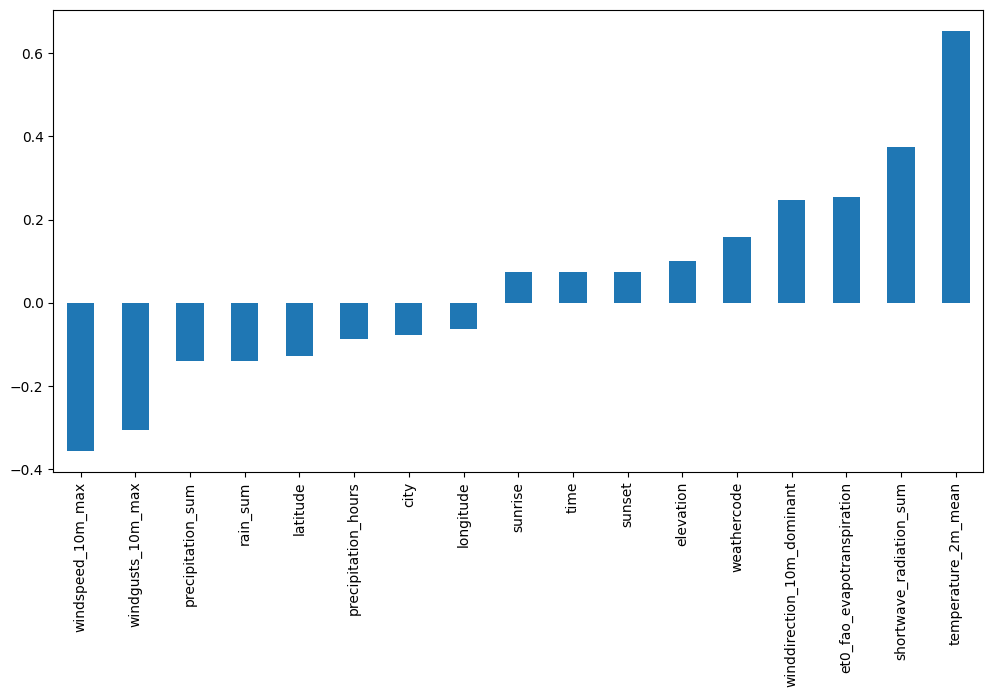

In [44]:
plt.figure(figsize=(12,6))
df.corr()["apparent_temperature_mean"].sort_values().drop("apparent_temperature_mean").plot(kind="bar")

In [45]:
sunrise_surnset= df[["time", "sunrise", "sunset"]]

In [46]:
df.columns

Index(['time', 'weathercode', 'temperature_2m_mean',
       'apparent_temperature_mean', 'sunrise', 'sunset',
       'shortwave_radiation_sum', 'precipitation_sum', 'rain_sum',
       'precipitation_hours', 'windspeed_10m_max', 'windgusts_10m_max',
       'winddirection_10m_dominant', 'et0_fao_evapotranspiration', 'latitude',
       'longitude', 'elevation', 'city'],
      dtype='object')

In [47]:
df.drop(["sunset", "sunrise", "rain_sum", "precipitation_hours", "latitude"], axis=1, inplace=True)

In [48]:
df.columns

Index(['time', 'weathercode', 'temperature_2m_mean',
       'apparent_temperature_mean', 'shortwave_radiation_sum',
       'precipitation_sum', 'windspeed_10m_max', 'windgusts_10m_max',
       'winddirection_10m_dominant', 'et0_fao_evapotranspiration', 'longitude',
       'elevation', 'city'],
      dtype='object')

In [49]:
df.head(3)

,time,weathercode,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,longitude,elevation,city
0,2010-01-01,2,26.1,29.2,20.92,0.0,11.7,27.4,20,4.58,79.899994,16,1
1,2010-01-02,51,26.2,29.8,17.71,0.1,13.0,27.0,24,3.84,79.899994,16,1
2,2010-01-03,51,26.0,29.9,17.76,0.6,12.3,27.4,16,3.65,79.899994,16,1


In [50]:
df.set_index('time', inplace=True)

In [51]:
df.head()

,weathercode,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,longitude,elevation,city
time,,,,,,,,,,,,
2010-01-01,2,26.1,29.2,20.92,0.0,11.7,27.4,20,4.58,79.899994,16,1
2010-01-02,51,26.2,29.8,17.71,0.1,13.0,27.0,24,3.84,79.899994,16,1
2010-01-03,51,26.0,29.9,17.76,0.6,12.3,27.4,16,3.65,79.899994,16,1
2010-01-04,2,25.3,27.8,16.50,0.0,17.0,34.6,356,3.79,79.899994,16,1
2010-01-05,1,24.5,26.1,23.61,0.0,18.7,37.1,355,4.97,79.899994,16,1


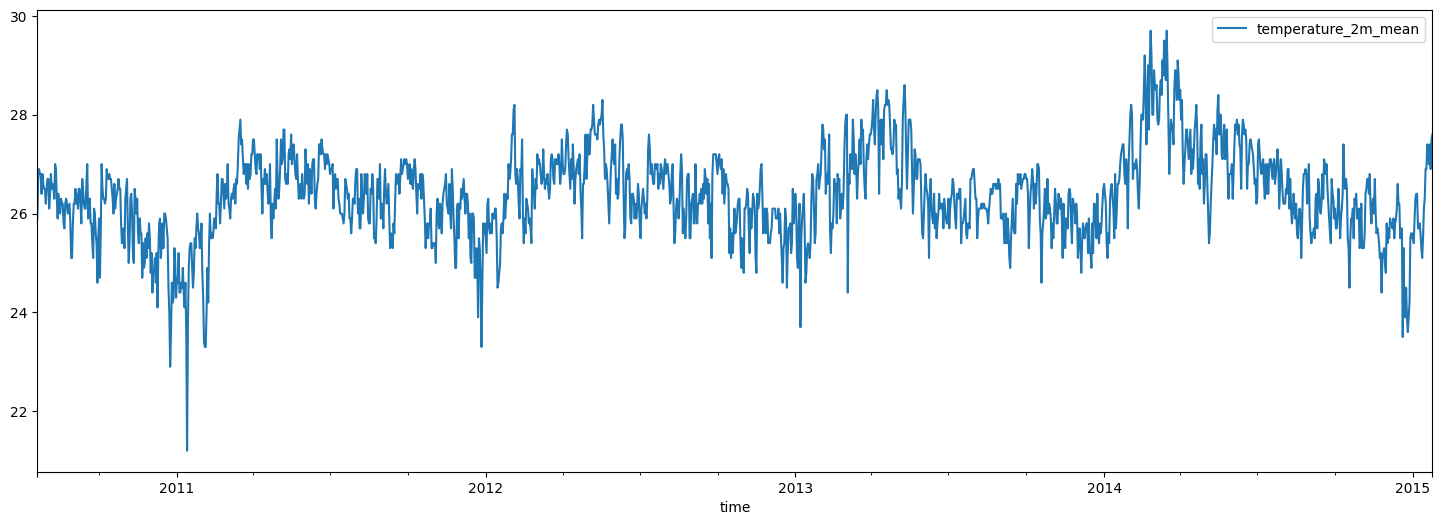

In [52]:
df[['temperature_2m_mean']][200:1850].plot(figsize=(18, 6))
plt.show()


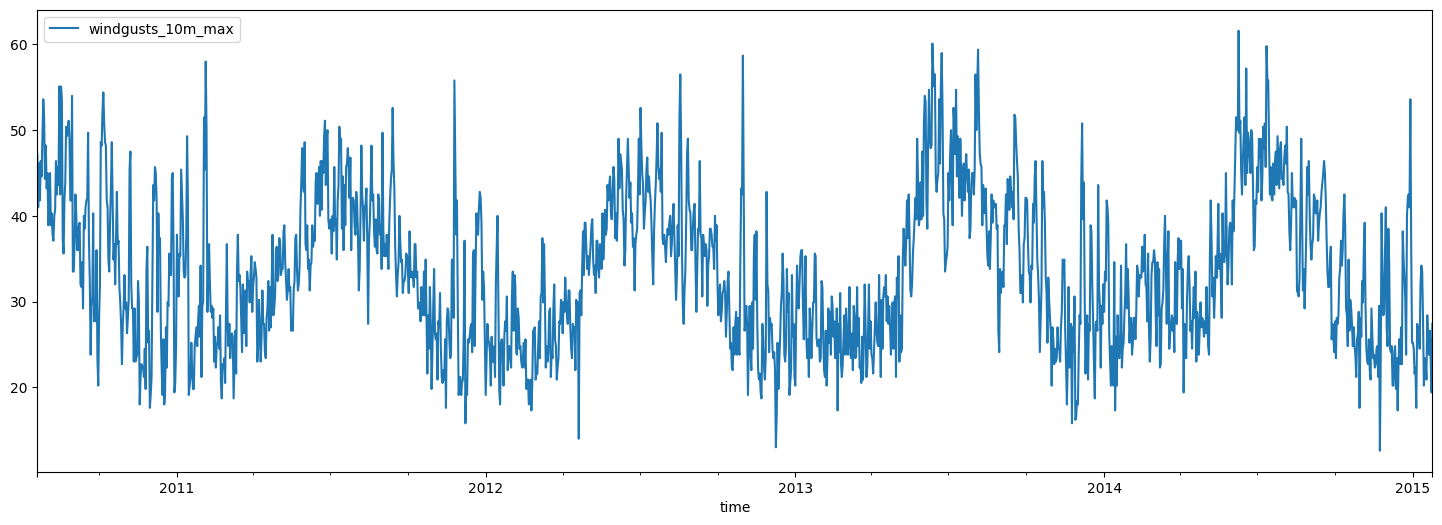

In [53]:
df[['windgusts_10m_max']][200:1850].plot(figsize=(18, 6))
plt.show()


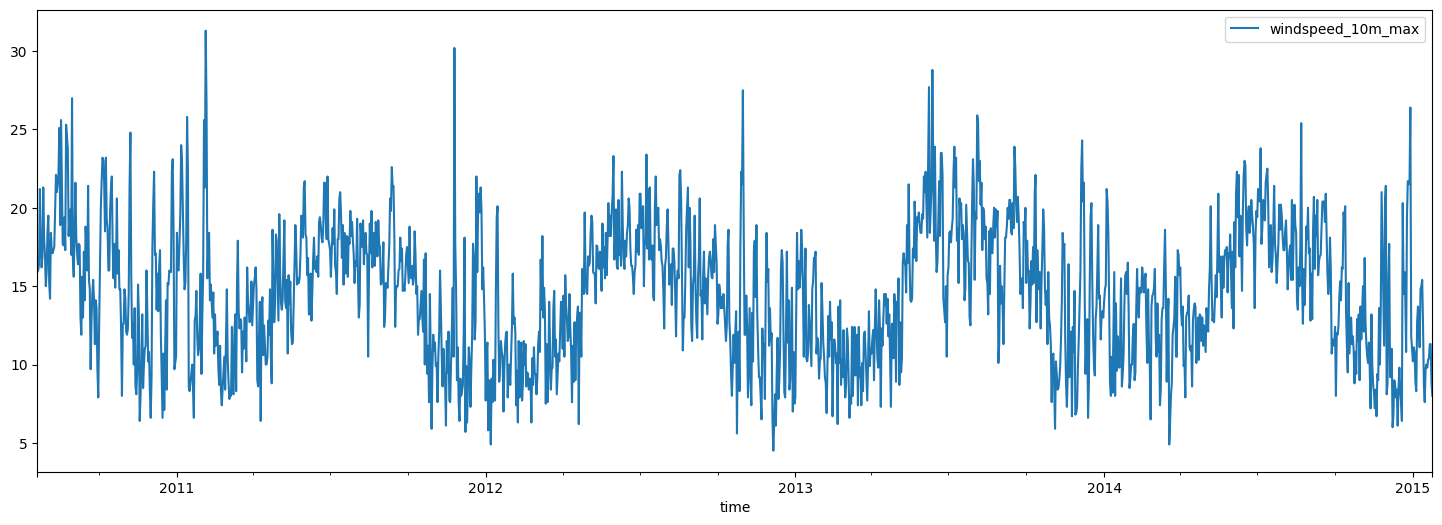

In [54]:
df[['windspeed_10m_max']][200:1850].plot(figsize=(18, 6))
plt.show()


# Data Preprocessing 

In [55]:
df['Seconds'] = df.index.map(pd.Timestamp.timestamp)

In [56]:
df.head(3)

,weathercode,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,longitude,elevation,city,Seconds
time,,,,,,,,,,,,,
2010-01-01,2,26.1,29.2,20.92,0.0,11.7,27.4,20,4.58,79.899994,16,1,1.262304e+09
2010-01-02,51,26.2,29.8,17.71,0.1,13.0,27.0,24,3.84,79.899994,16,1,1.262390e+09
2010-01-03,51,26.0,29.9,17.76,0.6,12.3,27.4,16,3.65,79.899994,16,1,1.262477e+09


In [57]:
day = 60*60*24
year = 365.2425*day

df['Day sin'] = np.sin(df['Seconds'] * (2* np.pi / day))
df['Day cos'] = np.cos(df['Seconds'] * (2 * np.pi / day))
df['Year sin'] = np.sin(df['Seconds'] * (2 * np.pi / year))
df['Year cos'] = np.cos(df['Seconds'] * (2 * np.pi / year))
df.head()

,weathercode,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration,longitude,elevation,city,Seconds,Day sin,Day cos,Year sin,Year cos
time,,,,,,,,,,,,,,,,,
2010-01-01,2,26.1,29.2,20.92,0.0,11.7,27.4,20,4.58,79.899994,16,1,1.262304e+09,-4.416858e-12,1.0,0.005161,0.999987
2010-01-02,51,26.2,29.8,17.71,0.1,13.0,27.0,24,3.84,79.899994,16,1,1.262390e+09,-1.183198e-13,1.0,0.022362,0.999750
2010-01-03,51,26.0,29.9,17.76,0.6,12.3,27.4,16,3.65,79.899994,16,1,1.262477e+09,-1.037170e-11,1.0,0.039556,0.999217
2010-01-04,2,25.3,27.8,16.50,0.0,17.0,34.6,356,3.79,79.899994,16,1,1.262563e+09,-6.073158e-12,1.0,0.056739,0.998389
2010-01-05,1,24.5,26.1,23.61,0.0,18.7,37.1,355,4.97,79.899994,16,1,1.262650e+09,-1.774619e-12,1.0,0.073904,0.997265


In [58]:
df.drop("Seconds", axis=1, inplace=True)

In [59]:
df.columns

Index(['weathercode', 'temperature_2m_mean', 'apparent_temperature_mean',
       'shortwave_radiation_sum', 'precipitation_sum', 'windspeed_10m_max',
       'windgusts_10m_max', 'winddirection_10m_dominant',
       'et0_fao_evapotranspiration', 'longitude', 'elevation', 'city',
       'Day sin', 'Day cos', 'Year sin', 'Year cos'],
      dtype='object')

In [60]:
df = df[[ 'temperature_2m_mean', 'apparent_temperature_mean', 'windspeed_10m_max', 'windgusts_10m_max',
       'shortwave_radiation_sum', 'precipitation_sum', 'winddirection_10m_dominant',        
       'et0_fao_evapotranspiration', 'longitude', 'elevation', 'city', 'weathercode',
       'Day sin', 'Day cos', 'Year sin', 'Year cos']]

In [61]:
clean_data = df[['temperature_2m_mean', 'apparent_temperature_mean', 'windspeed_10m_max', 'windgusts_10m_max',
       'shortwave_radiation_sum', 'precipitation_sum', 'winddirection_10m_dominant',        
       'et0_fao_evapotranspiration', 'longitude', 'elevation', 'city', 'weathercode']]

In [62]:
# clean_data.to_csv("clean_data.csv")

In [63]:
df.head()

,temperature_2m_mean,apparent_temperature_mean,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,precipitation_sum,winddirection_10m_dominant,et0_fao_evapotranspiration,longitude,elevation,city,weathercode,Day sin,Day cos,Year sin,Year cos
time,,,,,,,,,,,,,,,,
2010-01-01,26.1,29.2,11.7,27.4,20.92,0.0,20,4.58,79.899994,16,1,2,-4.416858e-12,1.0,0.005161,0.999987
2010-01-02,26.2,29.8,13.0,27.0,17.71,0.1,24,3.84,79.899994,16,1,51,-1.183198e-13,1.0,0.022362,0.999750
2010-01-03,26.0,29.9,12.3,27.4,17.76,0.6,16,3.65,79.899994,16,1,51,-1.037170e-11,1.0,0.039556,0.999217
2010-01-04,25.3,27.8,17.0,34.6,16.50,0.0,356,3.79,79.899994,16,1,2,-6.073158e-12,1.0,0.056739,0.998389
2010-01-05,24.5,26.1,18.7,37.1,23.61,0.0,355,4.97,79.899994,16,1,1,-1.774619e-12,1.0,0.073904,0.997265


#### Convert df to numpy arrays & creating windows of data

In [64]:
def df_to_X_y(df, window_size=4):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    # print(i)
    row = [r for r in df_as_np[i:i+window_size]]
    # print(row)
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2], df_as_np[i+window_size][3]]
    # print(label)
    y.append(label)
  return np.array(X), np.array(y)

In [65]:
X, y = df_to_X_y(df)
X.shape, y.shape

((63904, 4, 16), (63904, 4))

In [66]:
X

array([[[ 2.61000000e+01,  2.92000000e+01,  1.17000000e+01, ...,
          1.00000000e+00,  5.16081021e-03,  9.99986683e-01],
        [ 2.62000000e+01,  2.98000000e+01,  1.30000000e+01, ...,
          1.00000000e+00,  2.23617461e-02,  9.99749945e-01],
        [ 2.60000000e+01,  2.99000000e+01,  1.23000000e+01, ...,
          1.00000000e+00,  3.95560646e-02,  9.99217353e-01],
        [ 2.53000000e+01,  2.78000000e+01,  1.70000000e+01, ...,
          1.00000000e+00,  5.67386772e-02,  9.98389064e-01]],

       [[ 2.62000000e+01,  2.98000000e+01,  1.30000000e+01, ...,
          1.00000000e+00,  2.23617461e-02,  9.99749945e-01],
        [ 2.60000000e+01,  2.99000000e+01,  1.23000000e+01, ...,
          1.00000000e+00,  3.95560646e-02,  9.99217353e-01],
        [ 2.53000000e+01,  2.78000000e+01,  1.70000000e+01, ...,
          1.00000000e+00,  5.67386772e-02,  9.98389064e-01],
        [ 2.45000000e+01,  2.61000000e+01,  1.87000000e+01, ...,
          1.00000000e+00,  7.39044994e-02,  9.97265

#### split the data into training, validation, and test sets

In [67]:
X_train, y_train = X[:40000], y[:40000]
X_val, y_val = X[40000:52000], y[40000:52000]
X_test, y_test = X[52000:], y[52000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((40000, 4, 16),
 (40000, 4),
 (12000, 4, 16),
 (12000, 4),
 (11904, 4, 16),
 (11904, 4))

In [68]:
X_train

array([[[ 2.61000000e+01,  2.92000000e+01,  1.17000000e+01, ...,
          1.00000000e+00,  5.16081021e-03,  9.99986683e-01],
        [ 2.62000000e+01,  2.98000000e+01,  1.30000000e+01, ...,
          1.00000000e+00,  2.23617461e-02,  9.99749945e-01],
        [ 2.60000000e+01,  2.99000000e+01,  1.23000000e+01, ...,
          1.00000000e+00,  3.95560646e-02,  9.99217353e-01],
        [ 2.53000000e+01,  2.78000000e+01,  1.70000000e+01, ...,
          1.00000000e+00,  5.67386772e-02,  9.98389064e-01]],

       [[ 2.62000000e+01,  2.98000000e+01,  1.30000000e+01, ...,
          1.00000000e+00,  2.23617461e-02,  9.99749945e-01],
        [ 2.60000000e+01,  2.99000000e+01,  1.23000000e+01, ...,
          1.00000000e+00,  3.95560646e-02,  9.99217353e-01],
        [ 2.53000000e+01,  2.78000000e+01,  1.70000000e+01, ...,
          1.00000000e+00,  5.67386772e-02,  9.98389064e-01],
        [ 2.45000000e+01,  2.61000000e+01,  1.87000000e+01, ...,
          1.00000000e+00,  7.39044994e-02,  9.97265

#### scaling the features

In [69]:
df.head(3)

,temperature_2m_mean,apparent_temperature_mean,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,precipitation_sum,winddirection_10m_dominant,et0_fao_evapotranspiration,longitude,elevation,city,weathercode,Day sin,Day cos,Year sin,Year cos
time,,,,,,,,,,,,,,,,
2010-01-01,26.1,29.2,11.7,27.4,20.92,0.0,20,4.58,79.899994,16,1,2,-4.416858e-12,1.0,0.005161,0.999987
2010-01-02,26.2,29.8,13.0,27.0,17.71,0.1,24,3.84,79.899994,16,1,51,-1.183198e-13,1.0,0.022362,0.999750
2010-01-03,26.0,29.9,12.3,27.4,17.76,0.6,16,3.65,79.899994,16,1,51,-1.037170e-11,1.0,0.039556,0.999217


In [73]:
temp_mean = np.mean(X_train[:, :, 0])
temp_std = np.std(X_train[:, :, 0])

app_temp_mean = np.mean(X_train[:, :, 1])
app_temp_std = np.std(X_train[:, :, 1])

winspeed_mean =np.mean(X_train[:, :, 2])
winspeed_std = np.std(X_train[:, :, 2])

windgusts_mean =np.mean(X_train[:, :, 3])
windgusts_std = np.std(X_train[:, :, 3])

radiation_mean =np.mean(X_train[:, :, 4])
radiation_std = np.std(X_train[:, :, 4])

precipitation_mean =np.mean(X_train[:, :, 5])
precipitation_std = np.std(X_train[:, :, 5])

winddirection_mean =np.mean(X_train[:, :, 6])
winddirection_std = np.std(X_train[:, :, 6])

eva_mean =np.mean(X_train[:, :, 7])
eva_std = np.std(X_train[:, :, 7])

longitude_mean =np.mean(X_train[:, :, 8])
longitude_std = np.std(X_train[:, :, 8])

elevation_mean =np.mean(X_train[:, :, 9])
elevation_std = np.std(X_train[:, :, 9])

In [74]:
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_mean) /temp_std
  X[:, :, 1] = (X[:, :, 1] - app_temp_mean) / app_temp_std
  X[:, :, 2] = (X[:, :, 2] - winspeed_mean) / winspeed_std
  X[:, :, 3] = (X[:, :, 3] - windgusts_mean) / windgusts_std
  X[:, :, 4] = (X[:, :, 4] - radiation_mean) / radiation_std
  X[:, :, 5] = (X[:, :, 5] - precipitation_mean) / precipitation_std
  X[:, :, 6] = (X[:, :, 6] - winddirection_mean) / winddirection_std
  X[:, :, 7] = (X[:, :, 7] - eva_mean) / eva_std
  X[:, :, 8] = (X[:, :, 8] - longitude_mean) / longitude_std
  X[:, :, 9] = (X[:, :, 9] - elevation_mean) / elevation_std

In [57]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [58]:
def preprocess_output(y):
  y[:, 0] = (y[:, 0] - temp_mean) / temp_std
  y[:, 1] = (y[:, 1] - app_temp_mean) / app_temp_std
  y[:, 2] = (y[:, 2] - winspeed_mean) / winspeed_std
  y[:, 3] = (y[:, 3] - windgusts_mean) / windgusts_std
  return y

In [59]:
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

array([[ 0.51431282, -0.68858898,  2.13642763,  1.6021548 ],
       [ 0.76452887,  0.29763781,  0.6591543 , -0.08602704],
       [ 0.01388074, -0.5725623 ,  0.6591543 ,  0.02385462],
       ...,
       [ 0.26409678,  0.87777121, -0.70448262, -0.26583339],
       [ 0.59771817,  0.70373119,  0.41767693,  0.67315533],
       [-0.06952461,  0.47167783, -0.17891422,  0.27358566]])

# Model defining 

#### import of TensorFlow and Keras libraries along with specific modules and functions for constructing and training a neural network model.

In [4]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import EarlyStopping

#### Define a Sequential model

In [61]:
X_train.shape

(40000, 4, 16)

In [62]:
model = Sequential()
model.add(InputLayer((4,16)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4, 32)          │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 4, 64)          │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,852 (550.20 KB)

 Trainable params: 140,852 (550.20 KB)

 Non-trainable params: 0 (0.00 B)

#### define necessary callbacks

In [63]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True)

In [64]:
cp = ModelCheckpoint('lstm_model/model_checkpoint.keras', save_best_only=True)

#### compile model

In [65]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

#### Fit the model to training data

In [66]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[cp, early_stop])

Epoch 1/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 21ms/step - loss: 0.7413 - root_mean_squared_error: 0.8560 - val_loss: 0.3445 - val_root_mean_squared_error: 0.5869
Epoch 2/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 0.3328 - root_mean_squared_error: 0.5768 - val_loss: 0.2701 - val_root_mean_squared_error: 0.5197
Epoch 3/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - loss: 0.2667 - root_mean_squared_error: 0.5164 - val_loss: 0.2469 - val_root_mean_squared_error: 0.4968
Epoch 4/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 0.2414 - root_mean_squared_error: 0.4912 - val_loss: 0.2260 - val_root_mean_squared_error: 0.4754
Epoch 5/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 0.2274 - root_mean_squared_error: 0.4767 - val_loss: 0.2191 - val_root_mean_squared_error: 0.4681
Epoch 6/200
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 0.2191 - root_mean_squared_error: 0.4681 - val_loss: 0.2057 - val_root_mean_squared_error: 0.4535
Epoch 7/200
1250/1250 

#### Evaluate the performance of LSTM model

In [67]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

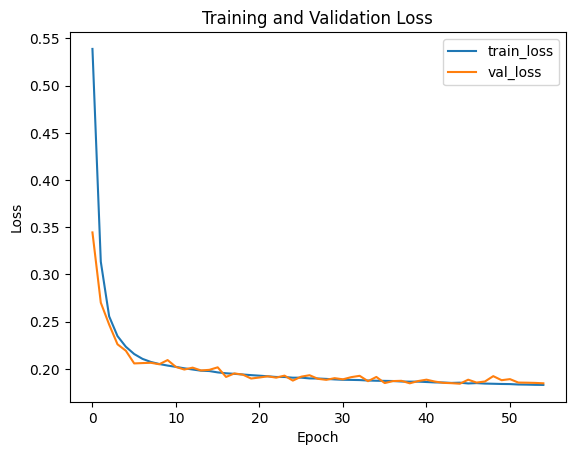

In [106]:
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [69]:
y_pred = model.predict(X_test)

372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [70]:
rmse = np.sqrt(mse(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 0.48592293504613504


In [ ]:
# model.save("model.h5")

#### load saved best model

In [72]:
rh_load_model = load_model('lstm_model/model_checkpoint.keras')

In [73]:
loadmodel_prediction = rh_load_model.predict(X_test)

372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


In [74]:
rmse = np.sqrt(mse(y_test, loadmodel_prediction))
print("RMSE:", rmse)

RMSE: 0.48592293504613504


## Comparison between actual values and predicted values

In [75]:
predictions = model.predict(X)

1997/1997 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step


In [76]:
predictions.shape

(63904, 4)

In [77]:
y.shape

(63904, 4)

In [75]:
def reverse_preprocessed_temp(arr):
    arr = (arr * temp_std ) + temp_mean
    return arr

def reverse_preprocessed_app_temp(arr):
    arr = (arr * app_temp_std ) + app_temp_mean
    return arr

def reverse_preprocessed_winspeed(arr):
    arr = (arr * winspeed_std ) + winspeed_mean
    return arr

def reverse_preprocessed_windgust(arr):
    arr = (arr * windgusts_std ) + windgusts_mean
    return arr

In [79]:
temp_predict = reverse_preprocessed_temp(predictions[:, 0])
app_temp_predict = reverse_preprocessed_app_temp(predictions[:, 1])
winspeed_predict = reverse_preprocessed_winspeed(predictions[:, 2])
windgust_predict = reverse_preprocessed_windgust(predictions[:, 3])

In [80]:
temp_actual = reverse_preprocessed_temp(y[:, 0])
app_temp_actual = reverse_preprocessed_app_temp(y[:, 1])
winspeed_actual = reverse_preprocessed_winspeed(y[:, 2])
windgust_actual = reverse_preprocessed_windgust(y[:, 3])

In [125]:
# temp_r2 = r2_score(temp_actual, temp_predict)
# print("R² Score temp:", temp_r2)
# app_temp_r2 = r2_score(app_temp_actual, app_temp_predict)
# print("R² Score app_temp:", app_temp_r2)
# windspeed_r2 = r2_score(winspeed_actual, winspeed_predict)
# print("R² Score windspeed:", windspeed_r2)
# windgust_r2 = r2_score(windgust_actual, windgust_predict)
# print("R² Score windgust:", windgust_r2)


In [105]:
predVSactual = pd.DataFrame({'temp_actual': temp_actual, 
                             'temp_predict': temp_predict,
                             "app_temp_actual": app_temp_actual,
                             "app_temp_predict":app_temp_predict,
                             "winspeed_actual":winspeed_actual,
                             "winspeed_predict":winspeed_predict,
                             "winspeed_actual": winspeed_actual,
                             "winspeed_predict": winspeed_predict,
                             "windgust_actual":windgust_actual,
                             "windgust_predict":windgust_predict
                             })

In [83]:
predVSactual

,temp_actual,temp_predict,app_temp_actual,app_temp_predict,winspeed_actual,winspeed_predict,windgust_actual,windgust_predict
0,24.5,25.382277,26.1,27.908833,18.7,15.413654,37.1,32.039261
1,25.0,24.757166,26.6,26.825756,17.1,17.042793,32.0,32.912247
2,25.8,25.110985,28.6,27.604824,13.5,14.551832,25.6,29.224413
3,25.5,25.848927,29.4,29.200426,13.0,11.334895,24.8,24.908585
4,25.9,25.734194,31.2,30.041079,11.5,10.047209,31.7,23.847500
...,...,...,...,...,...,...,...,...
63899,26.6,26.480305,31.6,31.549185,15.6,16.371401,43.6,37.958172
63900,26.9,26.623663,32.0,31.511688,16.4,17.558746,40.0,41.080830
63901,27.3,26.897223,32.7,31.956284,12.6,16.893852,32.4,39.472397
63902,27.7,27.067612,32.4,32.321934,20.5,15.058233,41.8,34.787514


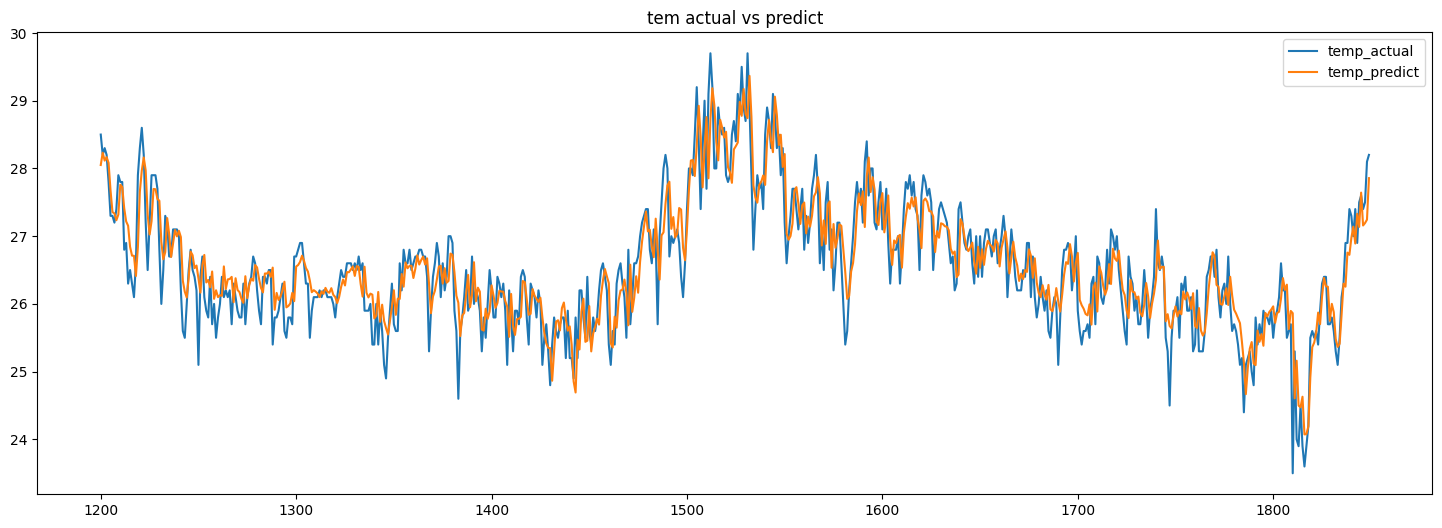

In [84]:
plt.figure(figsize=(18,6))

plt.plot(predVSactual["temp_actual"][1200:1850], label="temp_actual")
plt.plot(predVSactual["temp_predict"][1200:1850], label="temp_predict")
plt.title('tem actual vs predict')
plt.legend(loc=0)

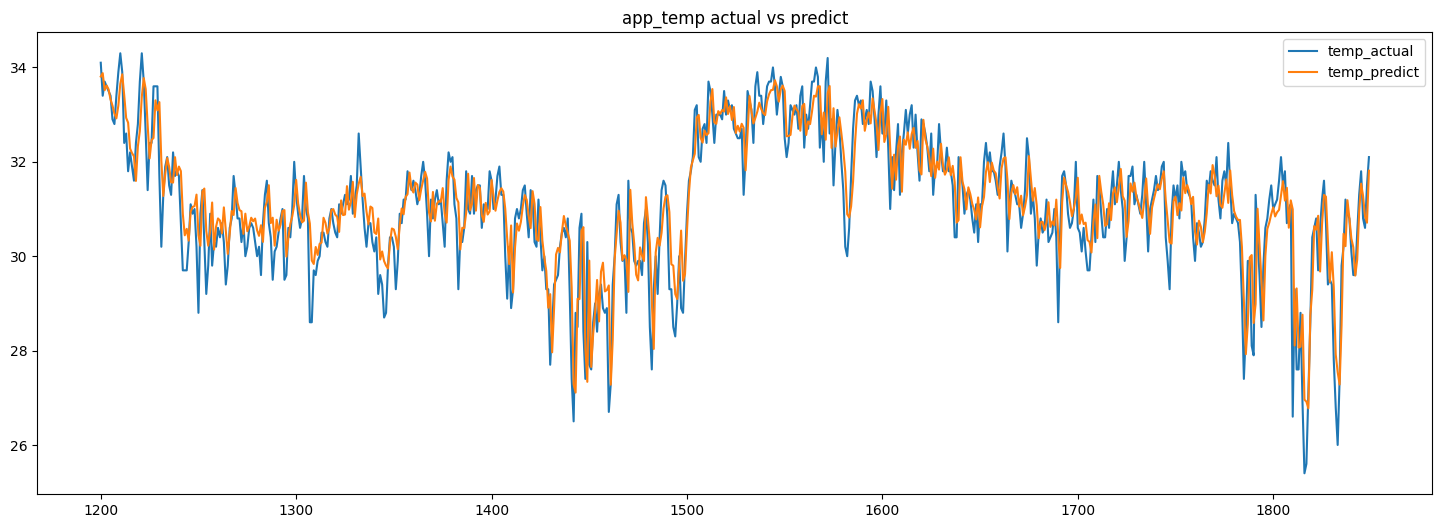

In [85]:
plt.figure(figsize=(18,6))

plt.plot(predVSactual["app_temp_actual"][1200:1850], label="temp_actual")
plt.plot(predVSactual["app_temp_predict"][1200:1850], label="temp_predict")
plt.title('app_temp actual vs predict')
plt.legend(loc=0)

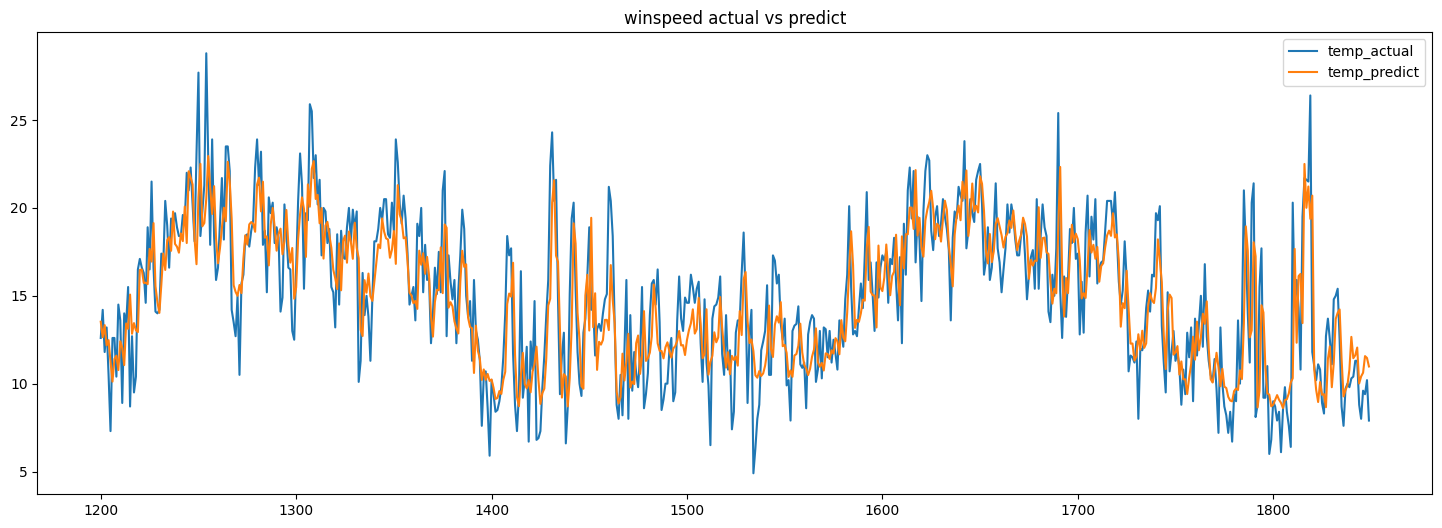

In [86]:
plt.figure(figsize=(18,6))

plt.plot(predVSactual["winspeed_actual"][1200:1850], label="temp_actual")
plt.plot(predVSactual["winspeed_predict"][1200:1850], label="temp_predict")
plt.title('winspeed actual vs predict')
plt.legend(loc=0)

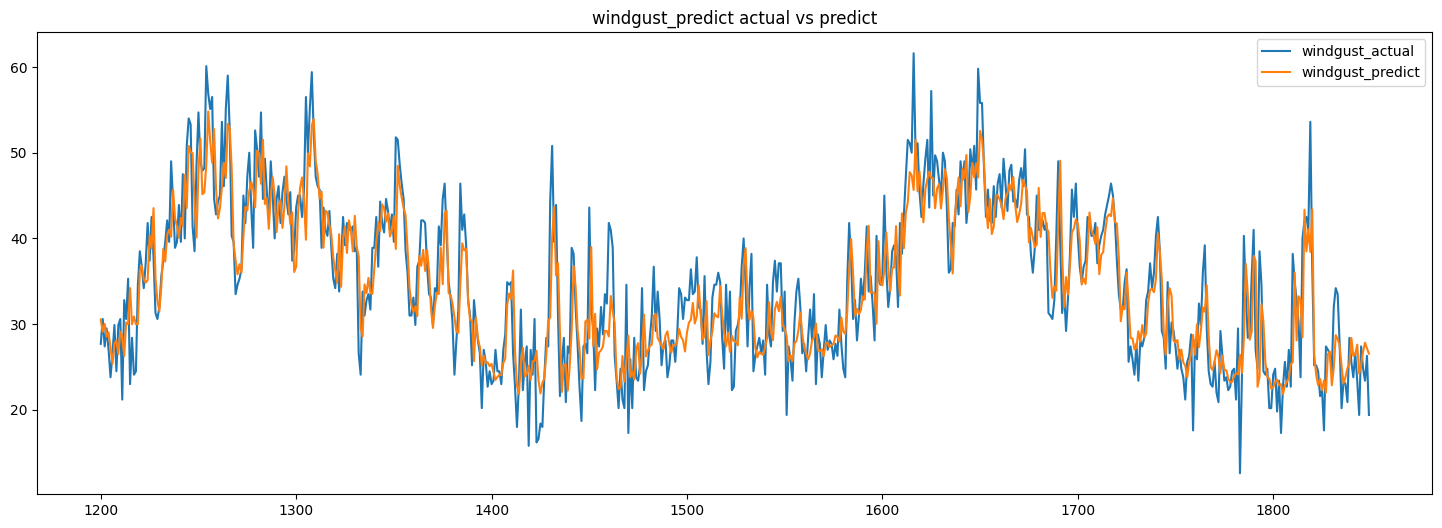

In [87]:
plt.figure(figsize=(18,6))

plt.plot(predVSactual["windgust_actual"][1200:1850], label="windgust_actual")
plt.plot(predVSactual["windgust_predict"][1200:1850], label="windgust_predict")
plt.title('windgust_predict actual vs predict')
plt.legend(loc=0)

# Get prediction 

In [5]:
clean_data = pd.read_csv("clean_data.csv", index_col='time', parse_dates=['time'])
clean_data.head()

,temperature_2m_mean,apparent_temperature_mean,windspeed_10m_max,windgusts_10m_max,shortwave_radiation_sum,precipitation_sum,winddirection_10m_dominant,et0_fao_evapotranspiration,longitude,elevation,city,weathercode
time,,,,,,,,,,,,
2010-01-01,26.1,29.2,11.7,27.4,20.92,0.0,20,4.58,79.899994,16,3,2
2010-01-02,26.2,29.8,13.0,27.0,17.71,0.1,24,3.84,79.899994,16,3,51
2010-01-03,26.0,29.9,12.3,27.4,17.76,0.6,16,3.65,79.899994,16,3,51
2010-01-04,25.3,27.8,17.0,34.6,16.50,0.0,356,3.79,79.899994,16,3,2
2010-01-05,24.5,26.1,18.7,37.1,23.61,0.0,355,4.97,79.899994,16,3,1


In [6]:
from tensorflow.keras.models import load_model

load_model = load_model('lstm_model/model_checkpoint.keras')


In [14]:
def get_next_ten_min_humidity(df, model=1):

    if len(df)!=4:
        print("data should contain 4 rawos")
        return()

    data=df
    data['Seconds'] = data.index.map(pd.Timestamp.timestamp)

    day = 60*60*24
    year = 365.2425*day

    data['Day sin'] = np.sin(data['Seconds'] * (2* np.pi / day))
    data['Day cos'] = np.cos(data['Seconds'] * (2 * np.pi / day))
    data['Year sin'] = np.sin(data['Seconds'] * (2 * np.pi / year))
    data['Year cos'] = np.cos(data['Seconds'] * (2 * np.pi / year))

    data.drop("Seconds", axis=1, inplace=True)


    def convert_df_input_arr(df, window_size=4):
        df_as_np = df.to_numpy()
        x = []
        row = [r for r in df_as_np[0:window_size]]
        # print(row)
        x.append(row)

        return np.array(x)
    
    p= convert_df_input_arr(data)
   
    preprocess(p)

    scaled_prediction= model.predict(p)

    temp_predict = reverse_preprocessed_temp(scaled_prediction[:, 0])
    app_temp_predict = reverse_preprocessed_app_temp(scaled_prediction[:, 1])
    winspeed_predict = reverse_preprocessed_winspeed(scaled_prediction[:, 2])
    windgust_predict = reverse_preprocessed_windgust(scaled_prediction[:, 3])



    
    
    print(
        f"Temperature Prediction: {temp_predict[0]:.1f}\n"
        f"Apparent Temperature Prediction: {app_temp_predict[0]:.1f}\n"
        f"Wind Speed Prediction: {winspeed_predict[0]:.1f}\n"
        f"Wind Gust Prediction: {windgust_predict[0]:.1f}"
    )

    
    return(temp_predict, app_temp_predict, winspeed_predict, windgust_predict)

In [11]:
clean_data[:4].to_csv("four_column1.csv")

In [76]:
test_prediction = get_next_ten_min_humidity(clean_data[:4], model=load_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Temperature Prediction: 25.4
Apparent Temperature Prediction: 27.9
Wind Speed Prediction: 15.4
Wind Gust Prediction: 32.0


In [13]:
clean_data["city"].unique()

array([ 3, 21, 12, 20, 16, 26, 11, 22, 27,  9, 28,  4,  8,  0, 29, 19, 13,
        5, 25,  1, 10,  2, 18, 17, 24, 14, 15,  7,  6, 23])

In [ ]:
from functions import get_next_day_whether

get_next_day_whether()